In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


class DataPoint():
    def __init__ (self,x,y,name = None):
        self.x = x
        self.y = y
        self.name = name
       
    
class Clusters():
    def __init__ (self,name=None):
        self.name = name
    
    def InitializeCluster(self,i):
        self.x = np.random.randint(10)
        self.y = np.random.randint(10)
    
    def ReCenter(self, ClusterData):
        x_points = []
        y_points = []
        length   = 0        
        for data in ClusterData:
            if data.name == self.name:
                x_points.append(data.x)
                y_points.append(data.y)
                length += 1
        if length > 0:
            self.x = sum(x_points)/length
            self.y = sum(y_points)/length
        
    def createClusters(self, num_clusters):
        self.clusters = []
        for i in range(1,num_clusters+1):                  
            self.cluster = Clusters("c{i}".format(i=i))
            self.cluster.InitializeCluster(i)
            self.clusters.append(self.cluster)
        return self.clusters
        
        
def DataSetCreator(num_data):
    dataset = []
    for i in range(num_data):                
        x = np.random.randint(100)
        y = np.random.randint(100)
        data = DataPoint(x,y)
        dataset.append(data)
    return dataset


    
def Clustering(clusters, dataset):
    total_cost = 0
    for data in dataset:
        cost = 10^10000
        for cluster in clusters:
            new_cost = CostFunction(cluster.x, cluster.y, data.x, data.y)
            if new_cost < cost:
                data.name = cluster.name
                cost = new_cost
        total_cost += cost
    return dataset


def CostFunction(x_c,y_c,x_data,y_data):
    cost = (x_c-x_data)**2 + (y_c-y_data)**2
    return cost  

def KNN(dataset):
    dataset = Clustering(clusters, dataset)
    for cluster in clusters:
        cluster.ReCenter(dataset)
    grid = ClassifyData(clusters,dataset)
    PlotData(grid,"KNN",clusters)
    return dataset

def ClassifyData(clusters,data_points):
    grid = [[0.0 for i in range(0,110)] for i in range(0,110)]
    cluster_range = len(clusters)
    for i in range(1,cluster_range + 1):
        for data in data_points:
                if data.name == None: 
                    pass 
                elif data.name == "c{i}".format(i=i): 
                    grid[data.x][data.y] = i
    return grid


def PlotData(grid, plotTitle,clusters):
    length = len(clusters)
    plot_colors = ['lightgrey','red','green','blue','purple','pink','black','lightgreen','lightblue']
    colormap = colors.ListedColormap(plot_colors[:length+1])
    plt.figure(figsize = (12,12))
    plt.title(plotTitle, fontsize = 24)
    plt.xlabel("x-coordinates", fontsize = 20)
    plt.ylabel("y-coordinates", fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.imshow(X = grid, cmap = colormap)
    


    

In [102]:
# dataset = r"C:\Users\aalic\OneDrive\Desktop\dataset.txt"
# new_dataset = []
# with open(dataset) as f:
#     dataset = f.readlines()
# for data in dataset:
#     x,y, rest = data.split('\t')
#     new_dataset.append(DataPoint(int(3.5*float(x)),int(3.5*float(y))))


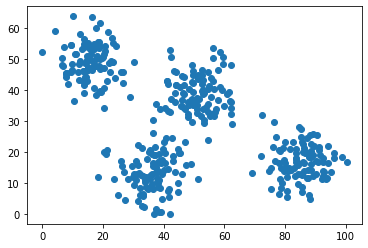

In [103]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = 10*X[:, ::-1] 
X[:,0] += abs(np.min(X[:,0]))
X[:,1] += abs(np.min(X[:,1]))
new_dataset = []
plt.scatter(X[:,0],X[:,1])
for x,y in zip(X[:,0],X[:,1]):
    x = int(x)
    y = int(y)
    new_dataset.append(DataPoint(y,x))


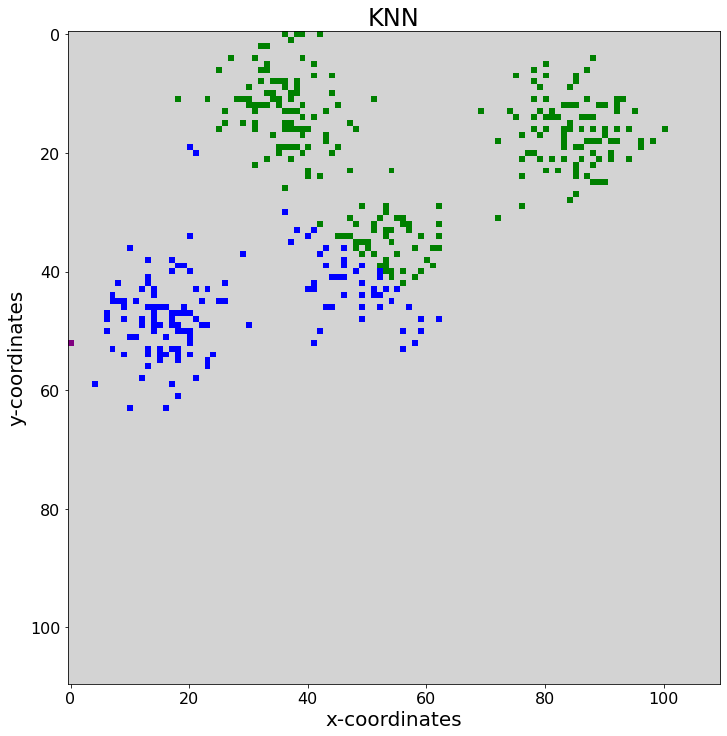

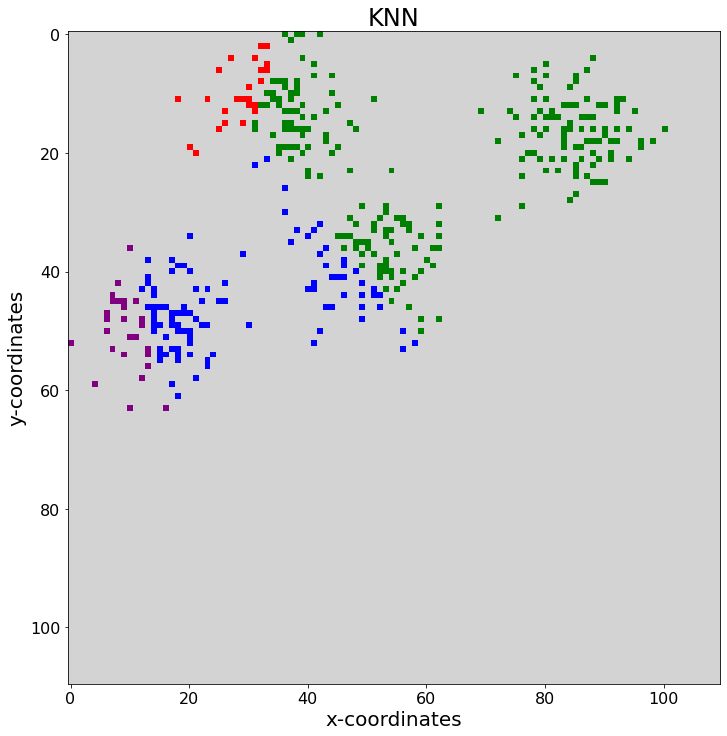

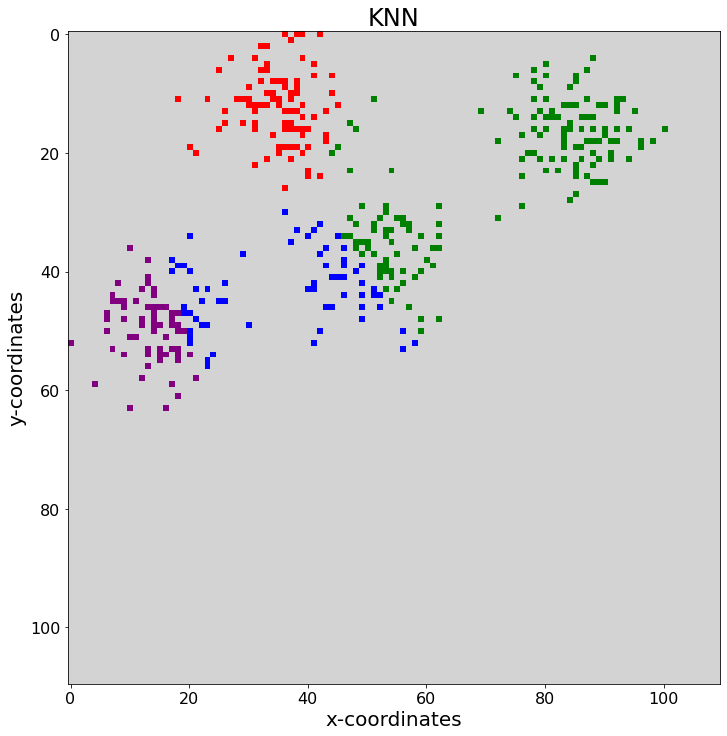

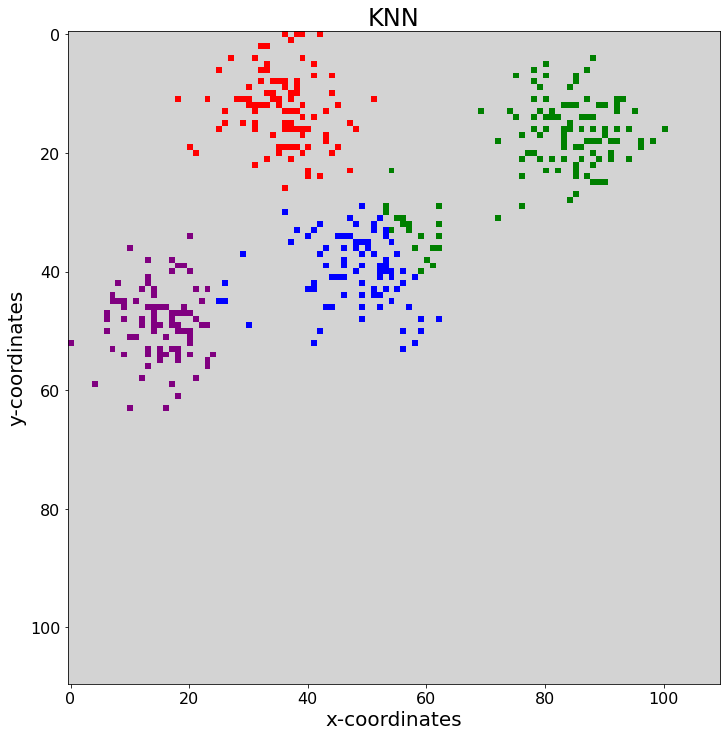

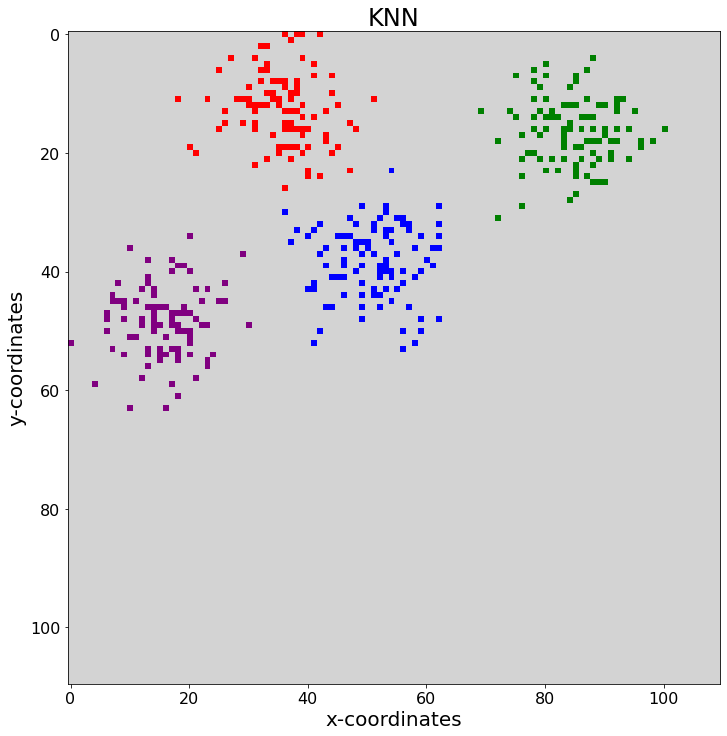

In [113]:
cluster_initializer = Clusters()
clusters = cluster_initializer.createClusters(4)    
for i in range(5):
    new_dataset = KNN(new_dataset)